In [1]:
import matplotlib
matplotlib.use('TKAgg')
from matplotlib import pyplot as plt

from tqdm import tqdm
import networkx as nx

In [2]:
from libcolgraph import *

### Let's define some functions to generate particular kinds of graphs

#### 1. 'wheel graph' (n): 
this kind of graph has $n+1$ vertices, one of them a 'central' vertex. $n$ vertices form a ring, and the central vertex connects to each of the $n$ vertices to complete the spokes of the wheel.

In [29]:
def wheelgraph(n):       
    '''
    this kind of graph has $n+1$ vertices, one of them a 'central' vertex. $n$ vertices form a ring, 
    and the central vertex connects to each of the $n$ vertices to complete the spokes of the wheel.
    g = BaseGraph()     
    for i in range(n):                                            
        g.add_vertex(i)                                          
    for a, b in zip(range(n), [n-1, *range(n-1)]):                         
        if a != b: g.make_edge(*sorted([a, b]))                      
        g.add_vertex(n)                                                  
    for i in range(n):  
        if i != n: g.make_edge(i, n)
    return g
    '''
    g = BaseGraph()
    g.load_from_nx(nx.wheel_graph(n))
    return g

In [4]:
def hypercubegraph(n):
    '''
    '''
    g = BaseGraph()
    g.load_from_nx(nx.hypercube_graph(n))
    return g

### Now we'll create a convenient way to generate sequences

In [5]:
def make_sequence(graphgen, *args, k=3, low=3, high=15, **kwargs):
    '''
    a function that accepts a graph generating function to generate the appropriate basegraph for parameter
    n from low to high, and then calls 'build_coloring_graph' on it with parameter k, the number of colors 
    '''
    for n in tqdm(range(low, high)):
        g = graphgen(n, *args, **kwargs)
        c = g.build_coloring_graph(k)
        yield len(c)

### Time for some test runs!

Let's look at the sequence of ColoringGraph sizes (graph of vertex colorings) of 'wheel' graphs with
4 colors

In [55]:
wheel3 = [*make_sequence(wheelgraph, k=3, low=1, high=27)]

100%|██████████| 26/26 [00:00<00:00, 2515.21it/s]


In [56]:
wheel3

[3, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0]

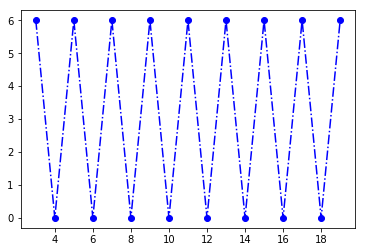

In [38]:
%matplotlib inline
plt.plot(range(3, 20), wheel3, 'bo-.')

In [57]:
wheel4 = [*make_sequence(wheelgraph, k=4, low=3, high=14)]

100%|██████████| 11/11 [00:00<00:00, 100.89it/s]


In [58]:
wheel4

[24, 24, 72, 120, 264, 504, 1032, 2040, 4104, 8184, 16392]

As you might figure out with some searching, this corresponds to [OEIS::A090860](http://oeis.org/A090860)
with the description: 

_Number of ways of 4-coloring a map in which there is a central circle surrounded by an annulus divided into n-1 regions. There are n regions in all._

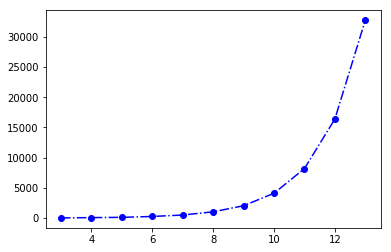

In [7]:
%matplotlib inline
plt.plot(range(3, 14), wheel4, 'bo-.')

The 5-color analogue of this isn't listed on OEIS (yet). Let us generate it anyway:

In [8]:
wheel5 = [*make_sequence(wheelgraph, k=5, low=3, high=12)]

100%|██████████| 9/9 [00:12<00:00,  3.14s/it]


In [14]:
wheel5

[120, 420, 1200, 3660, 10920, 32820, 98400, 295260, 885720]

As you might observe if you actually tried running this notebook, this is pretty time consuming to compute, so we will avoid computing the sequence to a longer length and stick to few terms. If you have plenty of time and compute power, feel free to play around with it for longer to get more terms of the sequence.

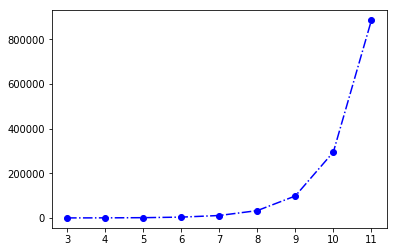

In [9]:
%matplotlib inline
plt.plot(range(3, 12), wheel5, 'bo-.')

In [22]:
cube3_3 = [*make_sequence(hypercubegraph, k=3, low=0, high=6)]

100%|██████████| 6/6 [00:16<00:00,  2.72s/it]


In [23]:
cube3_3

[0, 6, 18, 114, 2970, 1185282]

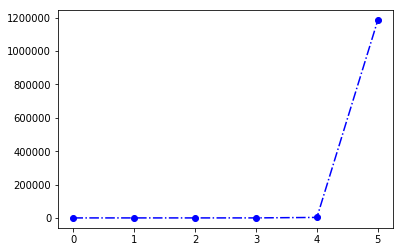

In [25]:
%matplotlib inline
plt.plot(range(6), cube3_3, 'bo-.')